# Relax Data Science Challenge

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

# load data

In [2]:
# user table
df = pd.read_csv("takehome_users.csv",encoding='latin-1')

# Usage summary table
df_ue = pd.read_csv("takehome_user_engagement.csv")

In [6]:
df_ue.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [17]:
df_ue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [18]:
df_ue.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


In [14]:
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [16]:
df.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


# Instructions to finish
- Fill the null values in user table and check for duplicate entries in both tables
- Join two tables based on user_id
- Then identify which user adopted user and make it a label
- Then use ML classification using decision tree/random forest
- Then find out the coefficient of each factors
- Factors with highest coefficients are most likely to predict adopted user


In [6]:
# convert time_stamp to datetime object
df_ue.time_stamp = pd.to_datetime(df_ue.time_stamp)
df_ue.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


# Select users who have logged into the product on three separate days in at least one seven day period 

In [14]:
df_ue.index=df_ue.time_stamp
df_ue.drop(labels='time_stamp',axis=1,inplace=True)

In [16]:
#Group by user_id and resample to 1 week period, sum over period
df_agg = df_ue.groupby([pd.Grouper(freq='W'),'user_id']).sum()
df_agg.head()

visited
time_stamp user_id         
2012-06-03 563            1
           1693           1
           1995           1
           2120           1
           2136           1

In [19]:
#find all user id's with a sum of 3 or more indicating an adopted user
df_adopt = df_agg[df_agg.visited>=3].unstack(level=1).melt()
adopted_users = pd.DataFrame(df_adopt.user_id.unique(),index=range(df_adopt.user_id.unique().shape[0]),columns=['user_id'])

In [20]:
adopted_users.head()

,user_id
0,1693
1,728
2,11764
3,5297
4,6171


In [21]:
df_adopt.head()

,NaN,user_id,value
0,visited,1693,3.0
1,visited,1693,NaN
2,visited,1693,3.0
3,visited,1693,NaN
4,visited,1693,3.0


# We create a dataframe with only adopted users

In [23]:
#create df of features
df_join = df.merge(adopted_users,how='inner',left_on='object_id',right_on='user_id')
df_join.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id
0,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2
1,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,10
2,20,2014-03-06 11:46:38,Helms Mikayla,lqyvjilf@uhzdq.com,SIGNUP,1.401364e+09,0,0,58,NaN,20
3,33,2014-03-11 06:29:09,Araujo José,JoseMartinsAraujo@cuvox.de,GUEST_INVITE,1.401518e+09,0,0,401,79.0,33
4,42,2012-11-11 19:05:07,Pinto Giovanna,GiovannaCunhaPinto@cuvox.de,SIGNUP,1.401045e+09,1,0,235,NaN,42


# Data wrangling

In [24]:
# drop irrelevant columns
col_drop = ['object_id','name','email','user_id']
df_join.drop(col_drop,axis=1,inplace=True)
df_join.head()

,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,2013-11-15 03:45:04,ORG_INVITE,1.396238e+09,0,0,1,316.0
1,2013-01-16 22:08:03,ORG_INVITE,1.401833e+09,1,1,318,4143.0
2,2014-03-06 11:46:38,SIGNUP,1.401364e+09,0,0,58,NaN
3,2014-03-11 06:29:09,GUEST_INVITE,1.401518e+09,0,0,401,79.0
4,2012-11-11 19:05:07,SIGNUP,1.401045e+09,1,0,235,NaN


In [26]:
df_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1445 entries, 0 to 1444
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   creation_time               1445 non-null   object 
 1   creation_source             1445 non-null   object 
 2   last_session_creation_time  1445 non-null   float64
 3   opted_in_to_mailing_list    1445 non-null   int64  
 4   enabled_for_marketing_drip  1445 non-null   int64  
 5   org_id                      1445 non-null   int64  
 6   invited_by_user_id          817 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 90.3+ KB


In [27]:
# fill NaN values in invited_by_user_id
df_join['invited_by_user_id'].fillna(value=0,inplace=True)

In [50]:
# Convert creation_time to float
df_join['creation_time'] = pd.to_datetime(df_join['creation_time']).astype(int)/1e9

In [53]:
# One hot encode creation_source
df_join = pd.concat([df_join.drop(df_join[['creation_source']], axis=1), pd.get_dummies(df_join[['creation_source']])], axis=1)

In [56]:
# Convert columns to Float64
for col in df_join.columns:
    df_join[col] = df_join[col].astype('float64')
df_join.head()

,creation_time,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1.384487e+09,1.396238e+09,0.0,0.0,1.0,316.0,0.0,1.0,0.0,0.0,0.0
1,1.358374e+09,1.401833e+09,1.0,1.0,318.0,4143.0,0.0,1.0,0.0,0.0,0.0
2,1.394106e+09,1.401364e+09,0.0,0.0,58.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.394519e+09,1.401518e+09,0.0,0.0,401.0,79.0,1.0,0.0,0.0,0.0,0.0
4,1.352661e+09,1.401045e+09,1.0,0.0,235.0,0.0,0.0,0.0,0.0,1.0,0.0


# Apply PCA to find out features with highest importance

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#scale data
scaler = StandardScaler()
features = scaler.fit_transform(df_join)

#fit PCA
pca = PCA()
components = pca.fit_transform(features)

In [66]:
np.sum(pca.explained_variance_ratio_[0:9])

0.9759938045417564

In [68]:
df_comp = pd.DataFrame(pca.components_,columns=df_join.columns,index=['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9','PC-10','PC-11'])
#absolute values of correlation with principal components
best_features = np.absolute(df_comp[np.absolute(df_comp) > 0.1])
best_features.head()

,creation_time,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
PC-1,NaN,NaN,NaN,NaN,NaN,0.637192,0.234846,0.484302,0.233835,0.391911,0.294644
PC-2,0.129555,0.129887,0.688695,0.694417,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PC-3,0.376579,0.346404,NaN,NaN,NaN,NaN,0.657707,0.513643,NaN,0.166038,NaN
PC-4,0.468770,0.437320,0.103103,NaN,NaN,NaN,0.425783,0.280327,0.146103,0.355169,0.401718
PC-5,0.273137,0.376917,NaN,NaN,0.389062,NaN,0.115538,0.104985,0.144304,0.438717,0.621442


In [69]:
#sum correlations to get a relative estimate of the feature importance
best_features.head(8).sum(axis=0).sort_values(ascending=False)

last_session_creation_time            2.267671
creation_time                         2.140259
creation_source_SIGNUP                1.953283
creation_source_SIGNUP_GOOGLE_AUTH    1.804445
creation_source_PERSONAL_PROJECTS     1.491256
creation_source_GUEST_INVITE          1.433874
creation_source_ORG_INVITE            1.383257
org_id                                1.304435
opted_in_to_mailing_list              0.791798
enabled_for_marketing_drip            0.694417
invited_by_user_id                    0.637192
dtype: float64

last_session_creation_time and creation_time seems to be most important factor in predicting user engagement.

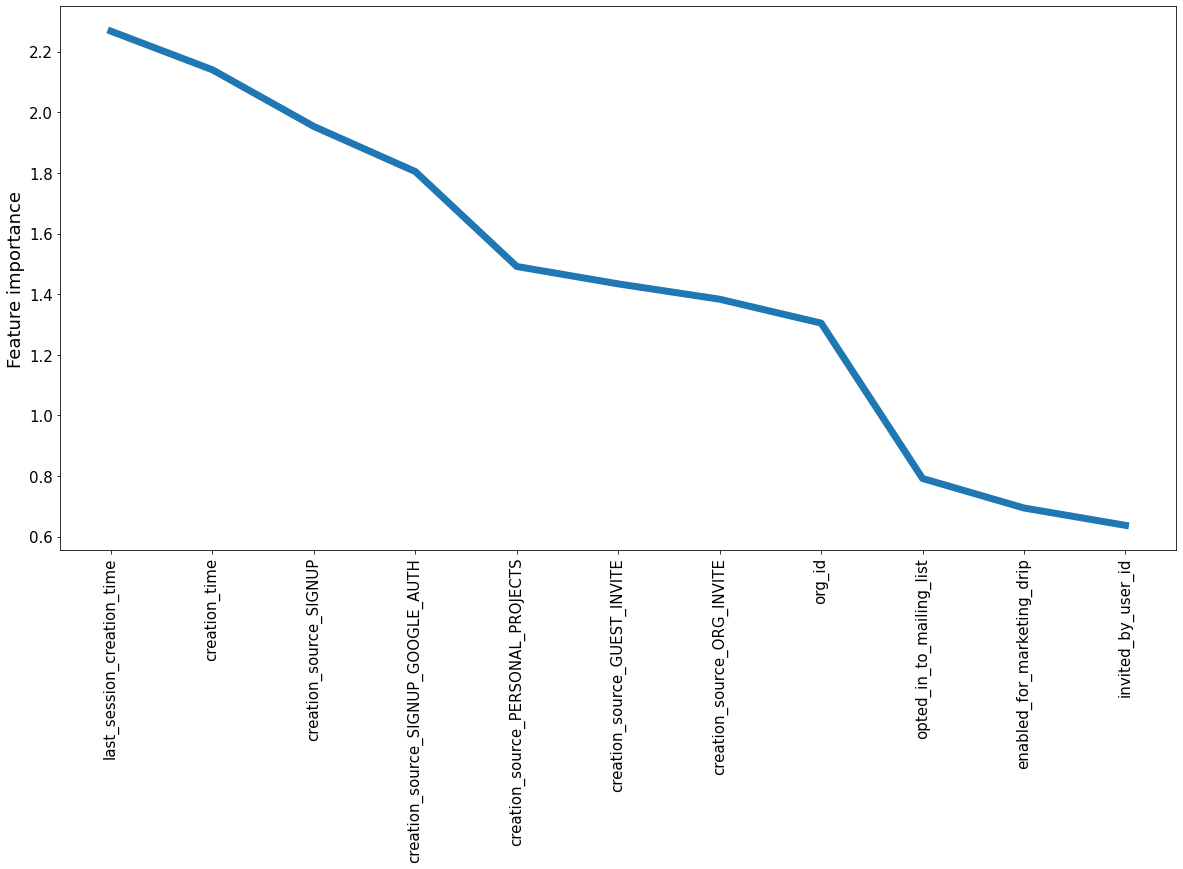

In [97]:
f, ax = plt.subplots(figsize=(20, 10))
plt.plot(best_features.head(8).sum(axis=0).sort_values(ascending=False),linewidth=7.0)
plt.xticks(fontsize = 15,rotation=90)
plt.ylabel('Feature importance',fontsize = 18)
plt.yticks(fontsize = 15)
plt.savefig('Feature_importance.png', bbox_inches='tight')
plt.show()